In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


df = pd.read_csv("mpipe-final.csv")

In [2]:
df['label'] = range(1, len(df) + 1)

In [3]:
df["architecture_type"] = "LSTM"
df.loc[df["Name"].str.contains("-GRU"),"architecture_type"] = "GRU"
df.loc[df["Name"].str.contains("-BLSTM"),"architecture_type"] = "Bidirectional LSTM"
df.loc[df["Name"].str.contains("-BGRU"),"architecture_type"] = "Bidirectional GRU"
df.loc[df["Name"].str.contains("Transformer"),"architecture_type"] = "Transformer"

In [4]:
df

,Name,epoch/val_categorical_accuracy (Max),unique_classes,Notes,Runtime,T_max,epochs,features,max_lr,min_lr,...,epoch/epoch,epoch/learning_rate (Min),epoch/loss (Min),epoch/val_loss (Min),epoch/f1_micro_tf,epoch/mcc_metric_tf,epoch/val_f1_micro_tf,epoch/val_mcc_metric_tf,label,architecture_type
0,AK-GRU32-LR-Dense256-gelu-fs=15-cls=3,0.946667,3,Model summary : \n<keras.src.engine.sequential...,244,101,200,all,0.0001,0.00005,...,199.0,0.000025,0.184267,0.203025,NaN,NaN,NaN,NaN,1,GRU
1,AK-BGRU32-LR-Dense256-gelu-cls=3,0.946667,3,Model summary : \n<keras.src.engine.sequential...,454,101,200,all,0.0001,0.00005,...,199.0,0.000025,0.139716,0.223478,NaN,NaN,NaN,NaN,2,Bidirectional GRU
2,AK-GRU64-LR-Dense256-gelu-cls=3,0.940000,3,Model summary : \n<keras.src.engine.sequential...,233,101,200,all,0.0001,0.00005,...,199.0,0.000025,0.197659,0.225616,NaN,NaN,NaN,NaN,3,GRU
3,AK-GRU512-LR-Dense256-gelu-cls=3,0.940000,3,Model summary : \n<keras.src.engine.sequential...,181,101,200,all,0.0001,0.00005,...,199.0,0.000025,0.160763,0.316474,NaN,NaN,NaN,NaN,4,GRU
4,AK-BGRU16-LR-Dense256-gelu-cls=3,0.933333,3,Model summary : \n<keras.src.engine.sequential...,412,101,200,all,0.0001,0.00005,...,199.0,0.000025,0.157544,0.206329,NaN,NaN,NaN,NaN,5,Bidirectional GRU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,AK-LSTM256-LR-Dense128-gelu,NaN,3,Model summary : \n<keras.src.engine.sequential...,32,50,100,all,0.0001,0.00005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217,LSTM
217,LSTM256-Dense128-Dense256-LipsEyesHandsPose_5k,NaN,13,Model summary : \n<keras.src.engine.functional...,22,50,100,reduced-LipsEyesHandsPose,0.0001,0.00005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,LSTM
218,AK-BGRU256-LR-Dense256-gelu-fs=36-cls=5,NaN,5,Model summary : \n,1566,101,200,all,0.0001,0.00005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219,Bidirectional GRU
219,LSTM256-Dense128-Dense256-LipsEyesHandsPose_5k,NaN,13,Model summary : \n<keras.src.engine.functional...,25,50,100,reduced-LipsEyesHandsPose,0.0001,0.00005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,LSTM


c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Figure size 1000x600 with 0 Axes>

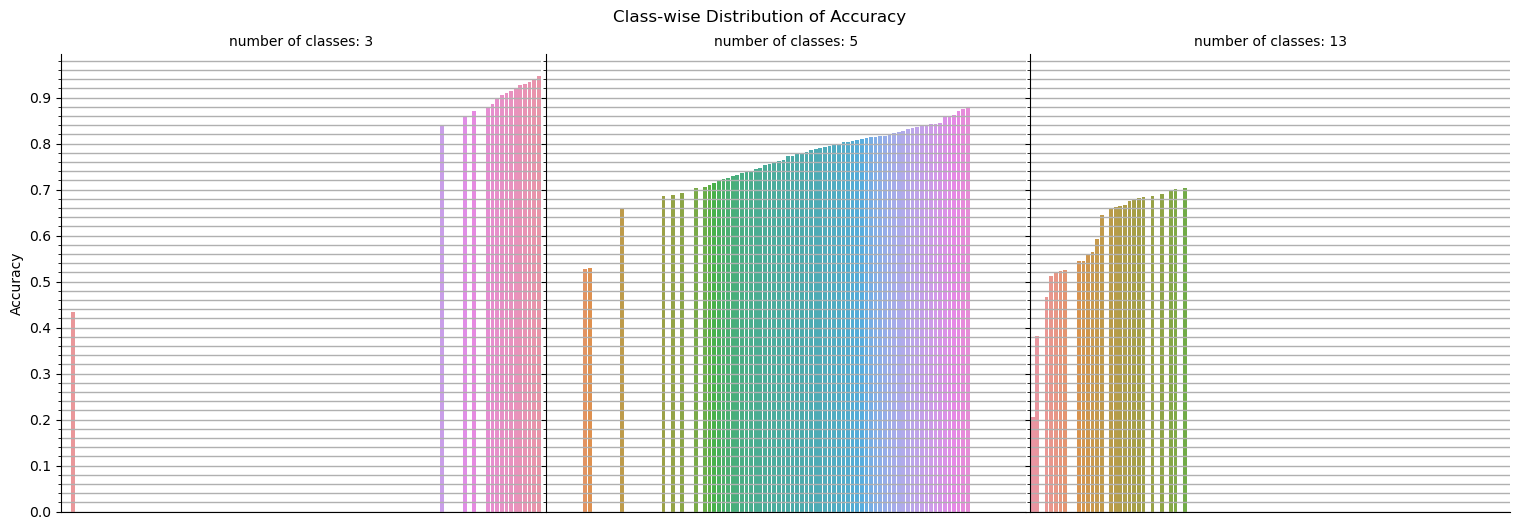

In [5]:
# Set the aesthetic style of the plots

# Create a histogram
plt.figure(figsize=(10, 6))
g = sns.catplot(data=df, kind="bar", x="epoch/val_categorical_accuracy (Max)", y="epoch/val_categorical_accuracy (Max)", col="unique_classes",  alpha=1, height=5, sharey=True)

g.fig.suptitle('Class-wise Distribution of Accuracy', y=1.02)  # Adjust title position with y
g.set_titles("number of classes: {col_name}", fontsize=32)
g.set_axis_labels("", "Accuracy")  # Empty string for the x-axis label


# Remove x-axis ticks for all axes
for ax in g.axes.flat:
    ax.set_xticks([])  # Remove x-axis ticks

    # Increase the number of minor grid lines on the x-axis
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust major x-axis locator to have more ticks
    ax.yaxis.set_minor_locator(plt.MaxNLocator(50))  # Optional: set minor locator for even finer grid lines

    # Enable minor grid lines if needed (not typically required for most visual styles)
    ax.grid(True, which='both', linestyle='-', linewidth=1)

# Remove x-axis ticks for all axes
for ax in g.axes.flat:
    ax.set_xticks([])  # Remove x-axis ticks

g.fig.tight_layout(pad=0)
plt.savefig("1.png")
# Show the plot
plt.show()


c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

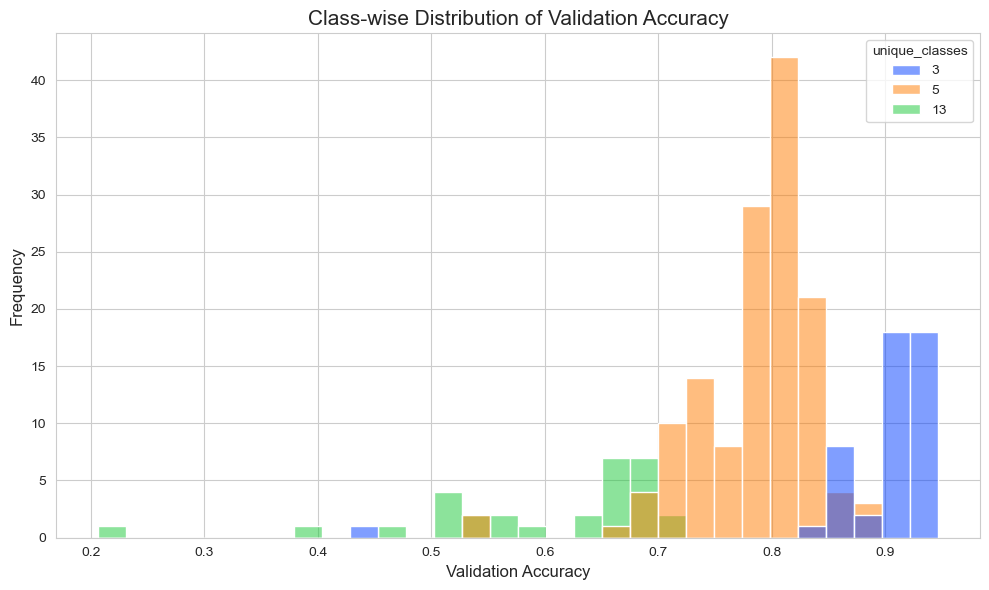

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the aesthetic style of the plots
sns.set_style("whitegrid")


accuracy_col = 'epoch/val_categorical_accuracy (Max)'

# Confirm that the 'accuracy' column exists
if accuracy_col not in df.columns:
    raise ValueError(f"The column {accuracy_col} does not exist in the dataframe.")

# Remove NaN values from the column
df = df.dropna(subset=[accuracy_col])

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create a single plot for all classes
# The hue parameter will differentiate the classes by color
sns.histplot(data=df, x=accuracy_col, hue='unique_classes', bins=30, kde=False, palette='bright')

# Customize plot
plt.title('Class-wise Distribution of Validation Accuracy', fontsize=15)
plt.xlabel('Validation Accuracy', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.grid(True)

plt.tight_layout()
plt.savefig("combined_class_distribution.png", dpi=300)
plt.show()


# 2  - Bidirectional vs Non-Bidirectional

c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Figure size 1000x600 with 0 Axes>

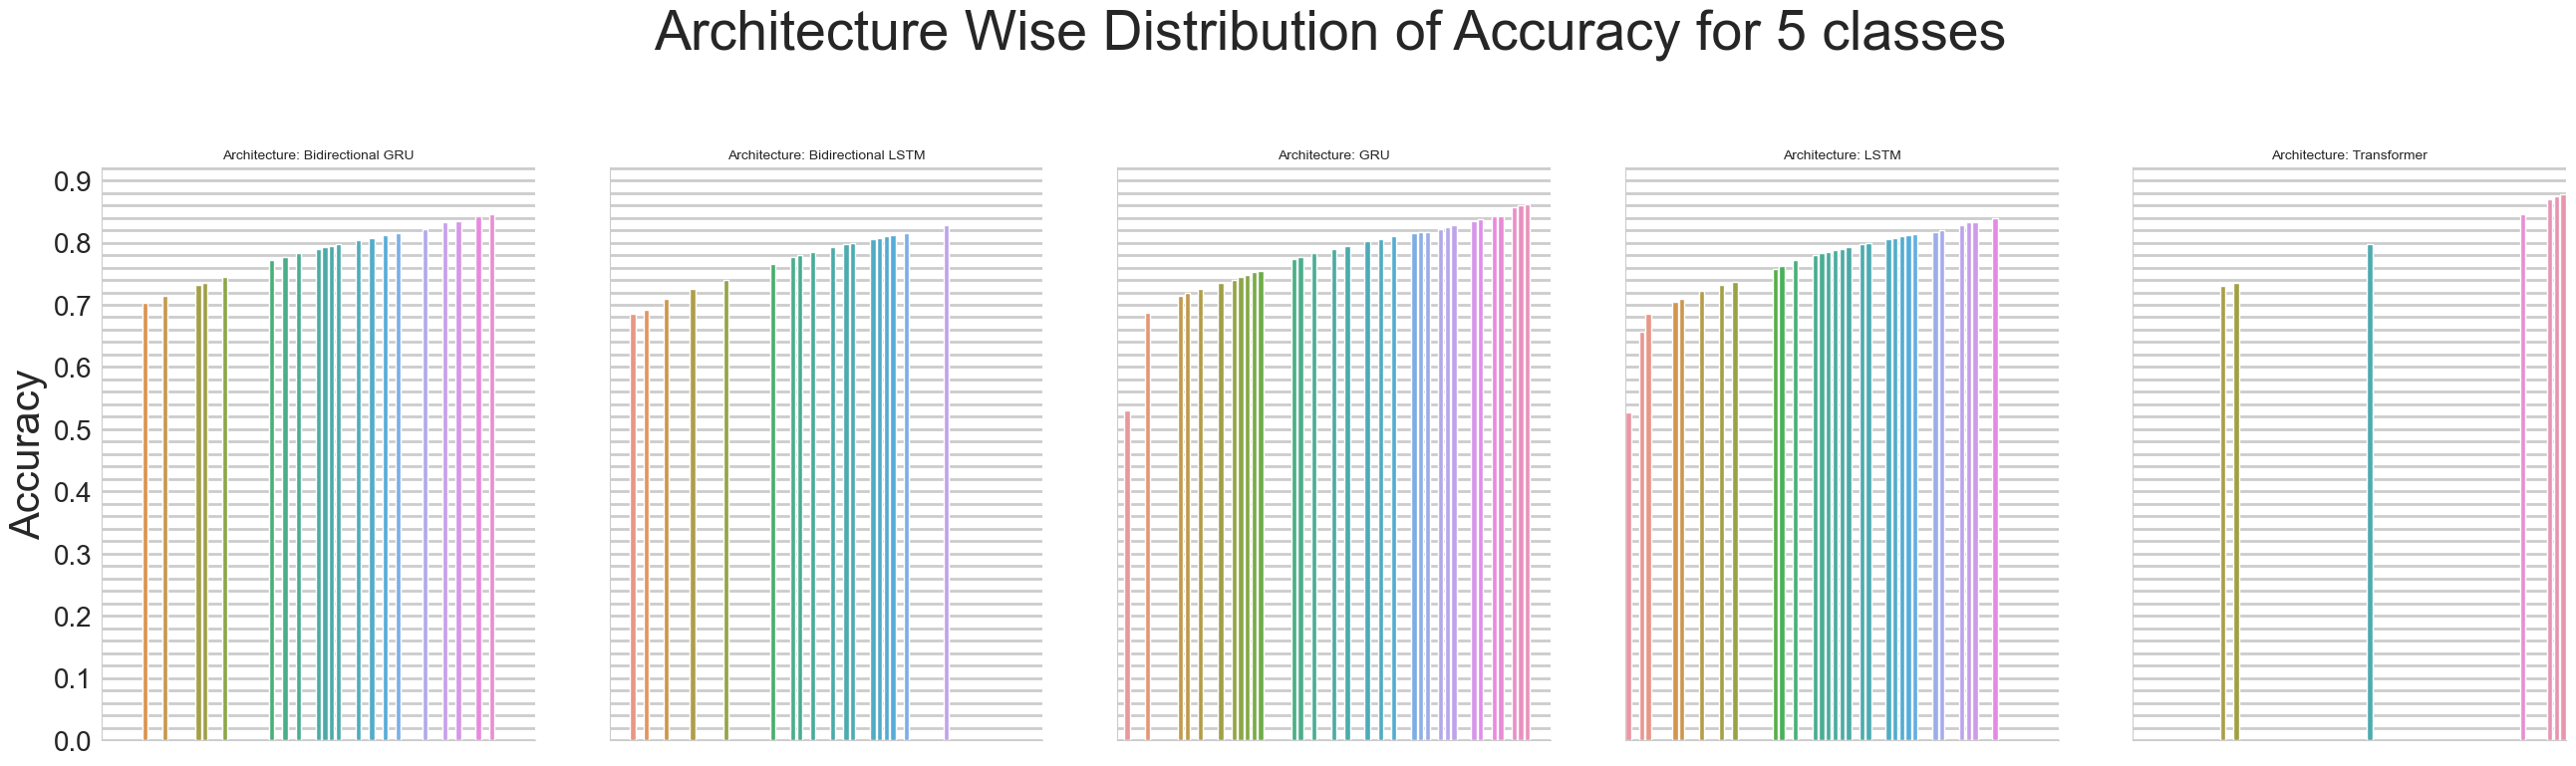

In [9]:
# Create a histogram

plt.figure(figsize=(10, 6))
g = sns.catplot(data=df[df["unique_classes"]==5], kind="bar", x="epoch/val_categorical_accuracy (Max)", y="epoch/val_categorical_accuracy (Max)", col="architecture_type",  
                alpha=1, height=5)

g.fig.suptitle('Architecture Wise Distribution of Accuracy for 5 classes', y=1.4, fontsize=40)  # Adjust title position with y
g.set_axis_labels("", "Accuracy", fontsize=30)  # Empty string for the x-axis label

g.fig.tight_layout(pad=-4)

# Remove x-axis ticks for all axes
for ax in g.axes.flat:
    ax.set_xticks([])  # Remove x-axis ticks

    # Increase the number of minor grid lines on the x-axis
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust major x-axis locator to have more ticks
    ax.yaxis.set_minor_locator(plt.MaxNLocator(50))  # Optional: set minor locator for even finer grid lines

    # Enable minor grid lines if needed (not typically required for most visual styles)
    ax.grid(True, which='both', linestyle='-', linewidth=2)

    # Customization to increase font size of tick labels (not previously in your code)
    ax.tick_params(axis='both', which='major', labelsize=20)  # Increase font size of major ticks


# Remove x-axis ticks for all axes
for ax in g.axes.flat:
    ax.set_xticks([])  # Remove x-axis ticks

g.set_titles("Architecture: {col_name}", fontsize=60)  # You can increase fontsize her


plt.savefig("2.png")
# Show the plot
plt.show()


c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

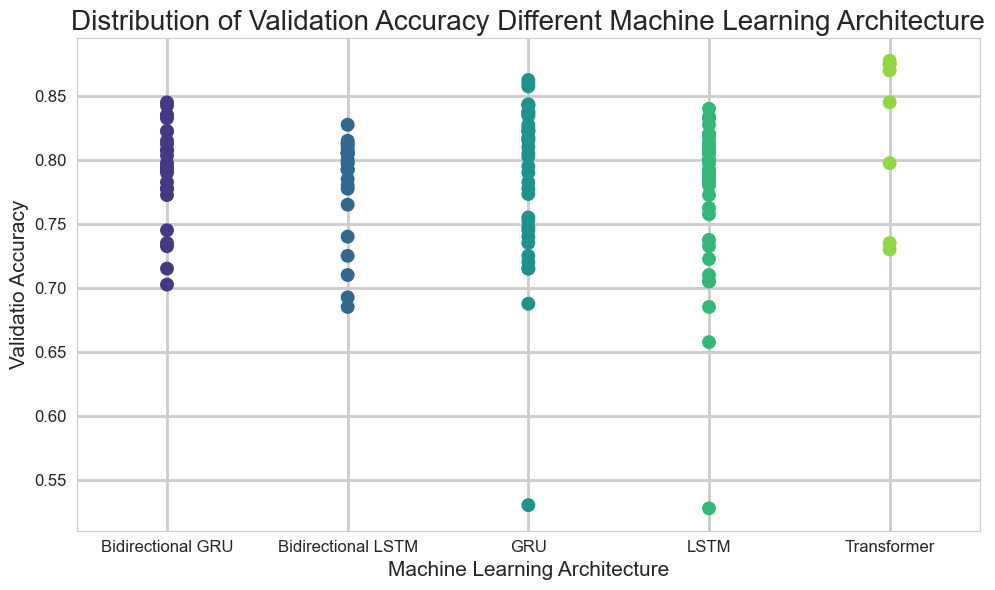

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Load your dataframe here (df)
# df = pd.read_csv('your_file.csv') or any other dataframe loading method

# Filter the dataframe for the specific class
df_class_5 = df[df["unique_classes"] == 5]

# Initialize the figure
plt.figure(figsize=(10, 6))

# Get unique architecture types and sort them
unique_archs = sorted(df_class_5['architecture_type'].unique())
palette = sns.color_palette("viridis", len(unique_archs))  # Create a color palette

# Create a strip plot for architecture types
# The hue parameter will differentiate the architectures
# Use jitter=False to align points vertically
sns.stripplot(data=df_class_5, x='architecture_type', y="epoch/val_categorical_accuracy (Max)", 
              hue='architecture_type', dodge=False, palette=palette, jitter=False, size=10, edgecolor='none')

# Customize plot
plt.title('Distribution of Validation Accuracy Different Machine Learning Architecture', fontsize=20)
plt.xlabel('Machine Learning Architecture', fontsize=15)
plt.ylabel('Validatio Accuracy', fontsize=15)
plt.grid(True, which='both', linestyle='-', linewidth=2)

# Remove the legend if you want to just display the colors without a legend
plt.legend([],[], frameon=False)

# Customization to increase font size of tick labels
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.savefig("architecture_distribution_points-allpoints.png", dpi=300)
plt.show()

# 3

In [11]:
sns.set_theme(style='whitegrid')  # Set a theme
df2 = pd.read_csv("AK_best_performing.csv")
df2

,Step,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/categorical_accuracy,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/categorical_accuracy__MIN,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/categorical_accuracy__MAX,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_categorical_accuracy,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_categorical_accuracy__MIN,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_categorical_accuracy__MAX,AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/categorical_accuracy,AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/categorical_accuracy__MIN,AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/categorical_accuracy__MAX,...,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/categorical_accuracy__MAX,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_categorical_accuracy,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_categorical_accuracy__MIN,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_categorical_accuracy__MAX,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/categorical_accuracy,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/categorical_accuracy__MIN,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/categorical_accuracy__MAX,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_categorical_accuracy,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_categorical_accuracy__MIN,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_categorical_accuracy__MAX
0,0,0.230000,0.230000,0.230000,0.1950,0.1950,0.1950,0.226250,0.226250,0.226250,...,0.221250,0.2625,0.2625,0.2625,0.276250,0.276250,0.276250,0.3850,0.3850,0.3850
1,1,0.255625,0.255625,0.255625,0.3200,0.3200,0.3200,0.240625,0.240625,0.240625,...,0.239375,0.2875,0.2875,0.2875,0.389375,0.389375,0.389375,0.4425,0.4425,0.4425
2,2,0.316250,0.316250,0.316250,0.3575,0.3575,0.3575,0.274375,0.274375,0.274375,...,0.293750,0.3525,0.3525,0.3525,0.441250,0.441250,0.441250,0.4750,0.4750,0.4750
3,3,0.354375,0.354375,0.354375,0.3650,0.3650,0.3650,0.373750,0.373750,0.373750,...,0.378125,0.3400,0.3400,0.3400,0.472500,0.472500,0.472500,0.5000,0.5000,0.5000
4,4,0.402500,0.402500,0.402500,0.4075,0.4075,0.4075,0.421250,0.421250,0.421250,...,0.388125,0.2850,0.2850,0.2850,0.492500,0.492500,0.492500,0.5150,0.5150,0.5150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.977500,0.977500,0.977500,0.8575,0.8575,0.8575,0.977500,0.977500,0.977500,...,0.905625,0.7750,0.7750,0.7750,0.968750,0.968750,0.968750,0.8050,0.8050,0.8050
196,196,0.982500,0.982500,0.982500,0.8575,0.8575,0.8575,0.973125,0.973125,0.973125,...,0.904375,0.7850,0.7850,0.7850,0.967500,0.967500,0.967500,0.8000,0.8000,0.8000
197,197,0.980625,0.980625,0.980625,0.8425,0.8425,0.8425,0.976250,0.976250,0.976250,...,0.906875,0.7900,0.7900,0.7900,0.966875,0.966875,0.966875,0.8225,0.8225,0.8225
198,198,0.983750,0.983750,0.983750,0.8525,0.8525,0.8525,0.976875,0.976875,0.976875,...,0.899375,0.7925,0.7925,0.7925,0.961875,0.961875,0.961875,0.8100,0.8100,0.8100


In [12]:
df2.columns

Index(['Step',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/categorical_accuracy',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/categorical_accuracy__MIN',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/categorical_accuracy__MAX',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_categorical_accuracy',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_categorical_accuracy__MIN',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_categorical_accuracy__MAX',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/categorical_accuracy',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/categorical_accuracy__MIN',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/categorical_accuracy__MAX',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_categorical_accuracy',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_categorical_accuracy__MIN',
       'AK-GRU512-LR-Den

c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

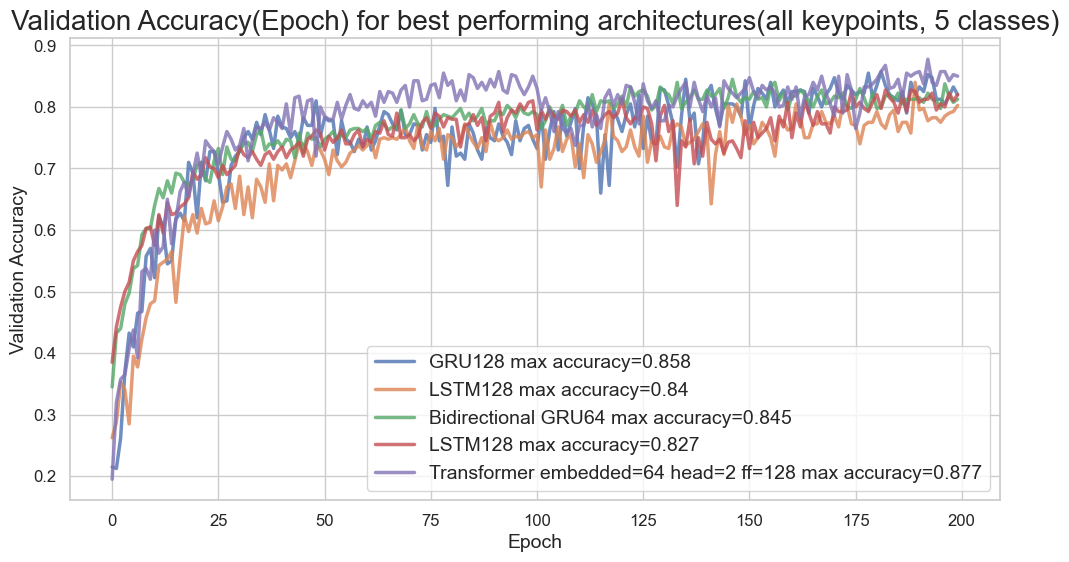

In [13]:
import numpy as np
plt.figure(figsize=(12, 6))


sns.lineplot(df2, x="Step", y="AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_categorical_accuracy", label=f"GRU128 max accuracy={round(np.max(df2['AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_categorical_accuracy']),3)}", alpha=0.8 ,linewidth=2.5)
sns.lineplot(df2, x="Step", y="AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_categorical_accuracy", label=f"LSTM128 max accuracy={round(np.max(df2['AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_categorical_accuracy']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df2, x="Step", y="AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_categorical_accuracy", label=f"Bidirectional GRU64 max accuracy={round(np.max(df2['AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_categorical_accuracy']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df2, x="Step", y="AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_categorical_accuracy", label=f"LSTM128 max accuracy={round(np.max(df2['AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_categorical_accuracy']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df2, x="Step", y="AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_categorical_accuracy", label=f"Transformer embedded=64 head=2 ff=128 max accuracy={round(np.max(df2['AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_categorical_accuracy']),3)}", alpha=0.8, linewidth=2.5)

plt.title('Validation Accuracy(Epoch) for best performing architectures(all keypoints, 5 classes)', fontsize=20)  # Adjust title size
plt.xlabel('Epoch', fontsize=14)  # Adjust x-axis label size
plt.ylabel('Validation Accuracy', fontsize=14)  # Adjust y-axis label size
plt.xticks(fontsize=12)  # Adjust x-axis tick size
plt.yticks(fontsize=12)  # Adjust y-axis tick size
plt.legend(fontsize=14)  # Adjust legend font size
plt.grid(True)

plt.savefig('3.png', dpi=300)  # Save the figure as a PNG with high resolution

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

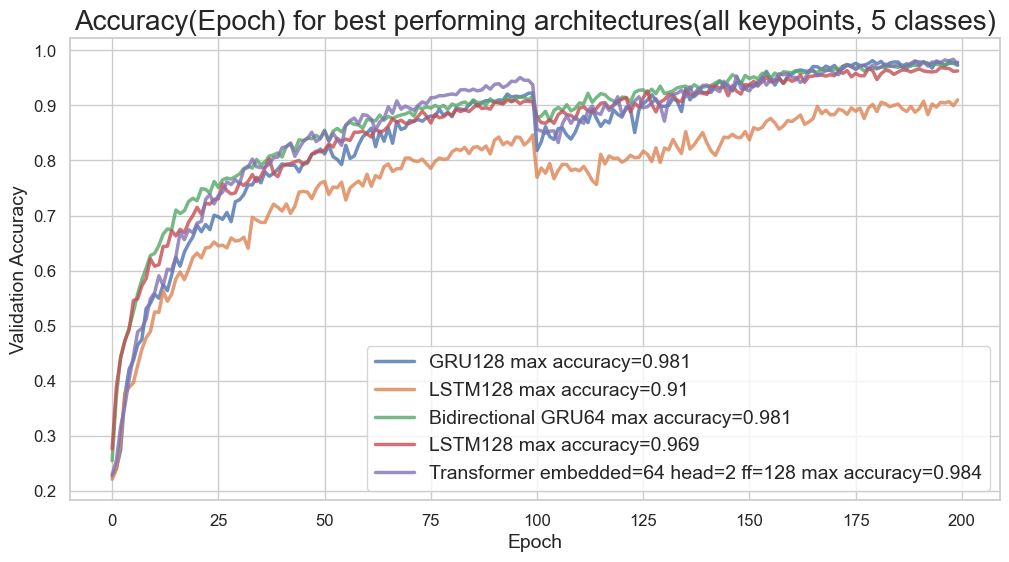

In [11]:
import numpy as np
plt.figure(figsize=(12, 6))


sns.lineplot(df2, x="Step", y="AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/categorical_accuracy", label=f"GRU128 max accuracy={round(np.max(df2['AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/categorical_accuracy']),3)}", alpha=0.8 ,linewidth=2.5)
sns.lineplot(df2, x="Step", y="AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/categorical_accuracy", label=f"LSTM128 max accuracy={round(np.max(df2['AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/categorical_accuracy']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df2, x="Step", y="AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/categorical_accuracy", label=f"Bidirectional GRU64 max accuracy={round(np.max(df2['AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/categorical_accuracy']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df2, x="Step", y="AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/categorical_accuracy", label=f"LSTM128 max accuracy={round(np.max(df2['AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/categorical_accuracy']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df2, x="Step", y="AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/categorical_accuracy", label=f"Transformer embedded=64 head=2 ff=128 max accuracy={round(np.max(df2['AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/categorical_accuracy']),3)}", alpha=0.8, linewidth=2.5)

plt.title('Accuracy(Epoch) for best performing architectures(all keypoints, 5 classes)', fontsize=20)  # Adjust title size
plt.xlabel('Epoch', fontsize=14)  # Adjust x-axis label size
plt.ylabel('Validation Accuracy', fontsize=14)  # Adjust y-axis label size
plt.xticks(fontsize=12)  # Adjust x-axis tick size
plt.yticks(fontsize=12)  # Adjust y-axis tick size
plt.legend(fontsize=14)  # Adjust legend font size
plt.grid(True)

plt.savefig('3a.png', dpi=300)  # Save the figure as a PNG with high resolution

In [14]:
df3 = pd.read_csv("AK_best_performing_loss.csv")
df3

,Step,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss__MIN,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss__MAX,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss__MIN,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss__MAX,AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss,AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss__MIN,AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss__MAX,...,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/loss__MAX,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_loss,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_loss__MIN,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_loss__MAX,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/loss,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/loss__MIN,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/loss__MAX,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_loss,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_loss__MIN,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_loss__MAX
0,0,1.709597,1.709597,1.709597,1.589400,1.589400,1.589400,1.768492,1.768492,1.768492,...,1.650710,1.646473,1.646473,1.646473,1.607065,1.607065,1.607065,1.501383,1.501383,1.501383
1,1,1.588381,1.588381,1.588381,1.557657,1.557657,1.557657,1.714186,1.714186,1.714186,...,1.641605,1.632754,1.632754,1.632754,1.453567,1.453567,1.453567,1.361753,1.361753,1.361753
2,2,1.519087,1.519087,1.519087,1.447039,1.447039,1.447039,1.667438,1.667438,1.667438,...,1.626005,1.602038,1.602038,1.602038,1.330521,1.330521,1.330521,1.229296,1.229296,1.229296
3,3,1.416795,1.416795,1.416795,1.378718,1.378718,1.378718,1.526551,1.526551,1.526551,...,1.544433,1.474553,1.474553,1.474553,1.252827,1.252827,1.252827,1.176587,1.176587,1.176587
4,4,1.333508,1.333508,1.333508,1.233132,1.233132,1.233132,1.339935,1.339935,1.339935,...,1.411220,1.526707,1.526707,1.526707,1.184372,1.184372,1.184372,1.141742,1.141742,1.141742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.072535,0.072535,0.072535,0.623305,0.623305,0.623305,0.148308,0.148308,0.148308,...,0.313711,0.671062,0.671062,0.671062,0.168954,0.168954,0.168954,0.744045,0.744045,0.744045
196,196,0.062149,0.062149,0.062149,0.558528,0.558528,0.558528,0.150753,0.150753,0.150753,...,0.308934,0.663332,0.663332,0.663332,0.151914,0.151914,0.151914,0.694994,0.694994,0.694994
197,197,0.059949,0.059949,0.059949,0.587601,0.587601,0.587601,0.145851,0.145851,0.145851,...,0.313438,0.661053,0.661053,0.661053,0.160602,0.160602,0.160602,0.626864,0.626864,0.626864
198,198,0.050389,0.050389,0.050389,0.582008,0.582008,0.582008,0.143817,0.143817,0.143817,...,0.329353,0.627223,0.627223,0.627223,0.160330,0.160330,0.160330,0.684362,0.684362,0.684362


In [15]:
df3.columns

Index(['Step', 'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss__MIN',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss__MAX',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss__MIN',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss__MAX',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss__MIN',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss__MAX',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_loss',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_loss__MIN',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_loss__MAX',
       'AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss',
       'AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss__MIN',
       

c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

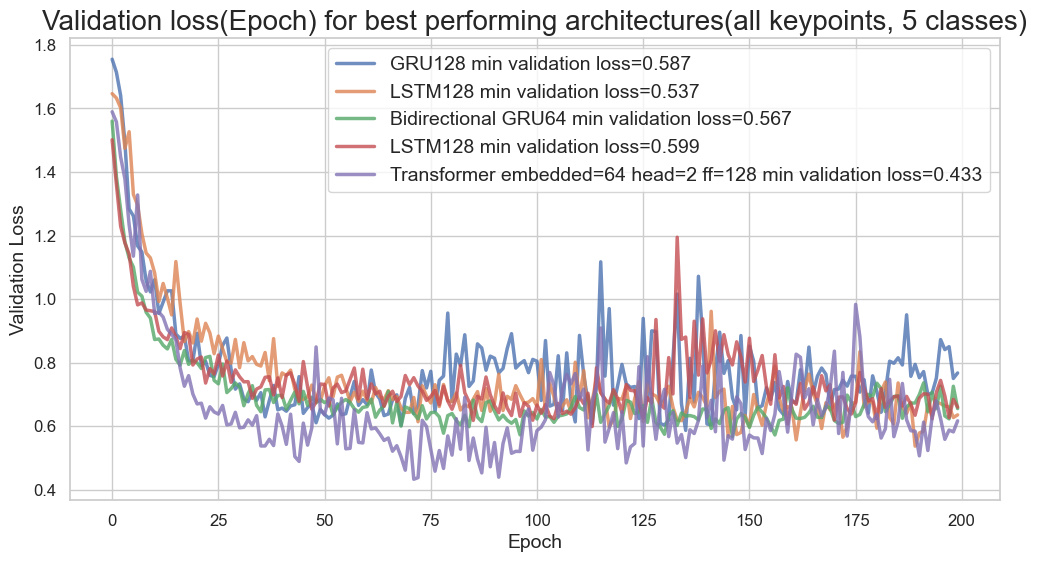

In [16]:
import numpy as np
plt.figure(figsize=(12, 6))

sns.lineplot(df3, x="Step", y="AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_loss", label=f"GRU128 min validation loss={round(np.min(df3['AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_loss']),3)}", alpha=0.8 ,linewidth=2.5)
sns.lineplot(df3, x="Step", y="AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_loss", label=f"LSTM128 min validation loss={round(np.min(df3['AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_loss']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df3, x="Step", y="AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_loss", label=f"Bidirectional GRU64 min validation loss={round(np.min(df3['AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_loss']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df3, x="Step", y="AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_loss", label=f"LSTM128 min validation loss={round(np.min(df3['AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_loss']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df3, x="Step", y="AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss", label=f"Transformer embedded=64 head=2 ff=128 min validation loss={round(np.min(df3['AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss']),3)}", alpha=0.8, linewidth=2.5)

plt.title('Validation loss(Epoch) for best performing architectures(all keypoints, 5 classes)', fontsize=20)  # Adjust title size
plt.xlabel('Epoch', fontsize=14)  # Adjust x-axis label size
plt.ylabel('Validation Loss', fontsize=14)  # Adjust y-axis label size
plt.xticks(fontsize=12)  # Adjust x-axis tick size
plt.yticks(fontsize=12)  # Adjust y-axis tick size
plt.legend(fontsize=14)  # Adjust legend font size
plt.grid(True)

plt.savefig('3v.png', dpi=300)  # Save the figure as a PNG with high resolution

In [17]:
df3

,Step,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss__MIN,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss__MAX,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss__MIN,AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss__MAX,AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss,AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss__MIN,AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss__MAX,...,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/loss__MAX,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_loss,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_loss__MIN,AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/val_loss__MAX,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/loss,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/loss__MIN,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/loss__MAX,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_loss,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_loss__MIN,AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/val_loss__MAX
0,0,1.709597,1.709597,1.709597,1.589400,1.589400,1.589400,1.768492,1.768492,1.768492,...,1.650710,1.646473,1.646473,1.646473,1.607065,1.607065,1.607065,1.501383,1.501383,1.501383
1,1,1.588381,1.588381,1.588381,1.557657,1.557657,1.557657,1.714186,1.714186,1.714186,...,1.641605,1.632754,1.632754,1.632754,1.453567,1.453567,1.453567,1.361753,1.361753,1.361753
2,2,1.519087,1.519087,1.519087,1.447039,1.447039,1.447039,1.667438,1.667438,1.667438,...,1.626005,1.602038,1.602038,1.602038,1.330521,1.330521,1.330521,1.229296,1.229296,1.229296
3,3,1.416795,1.416795,1.416795,1.378718,1.378718,1.378718,1.526551,1.526551,1.526551,...,1.544433,1.474553,1.474553,1.474553,1.252827,1.252827,1.252827,1.176587,1.176587,1.176587
4,4,1.333508,1.333508,1.333508,1.233132,1.233132,1.233132,1.339935,1.339935,1.339935,...,1.411220,1.526707,1.526707,1.526707,1.184372,1.184372,1.184372,1.141742,1.141742,1.141742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.072535,0.072535,0.072535,0.623305,0.623305,0.623305,0.148308,0.148308,0.148308,...,0.313711,0.671062,0.671062,0.671062,0.168954,0.168954,0.168954,0.744045,0.744045,0.744045
196,196,0.062149,0.062149,0.062149,0.558528,0.558528,0.558528,0.150753,0.150753,0.150753,...,0.308934,0.663332,0.663332,0.663332,0.151914,0.151914,0.151914,0.694994,0.694994,0.694994
197,197,0.059949,0.059949,0.059949,0.587601,0.587601,0.587601,0.145851,0.145851,0.145851,...,0.313438,0.661053,0.661053,0.661053,0.160602,0.160602,0.160602,0.626864,0.626864,0.626864
198,198,0.050389,0.050389,0.050389,0.582008,0.582008,0.582008,0.143817,0.143817,0.143817,...,0.329353,0.627223,0.627223,0.627223,0.160330,0.160330,0.160330,0.684362,0.684362,0.684362


In [18]:
df3.columns

Index(['Step', 'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss__MIN',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss__MAX',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss__MIN',
       'AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/val_loss__MAX',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss__MIN',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss__MAX',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_loss',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_loss__MIN',
       'AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/val_loss__MAX',
       'AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss',
       'AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss__MIN',
       

c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

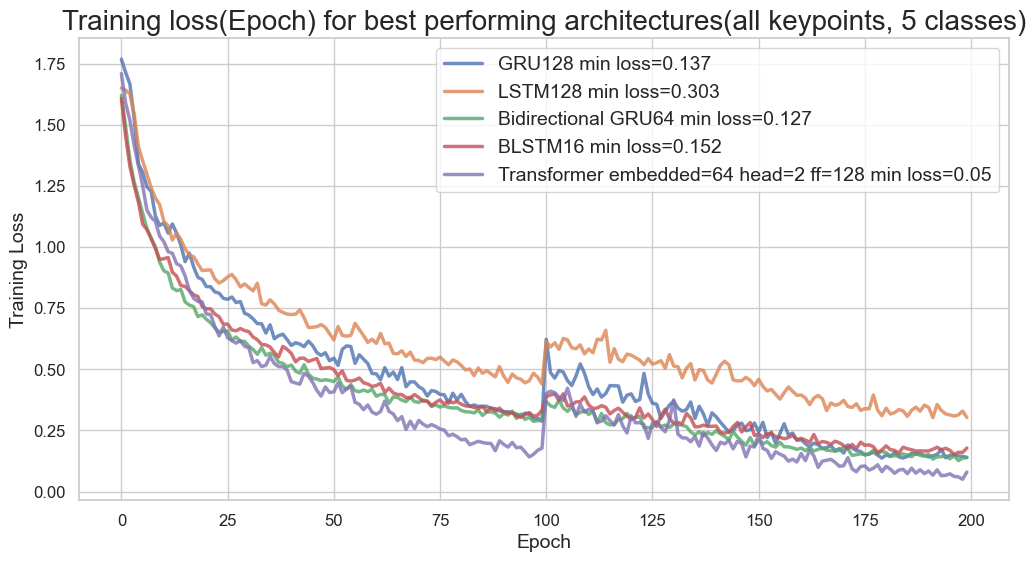

In [19]:
import numpy as np
plt.figure(figsize=(12, 6))

sns.lineplot(df3, x="Step", y="AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss", label=f"GRU128 min loss={round(np.min(df3['AK-GRU512-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss']),3)}", alpha=0.8 ,linewidth=2.5)
sns.lineplot(df3, x="Step", y="AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/loss", label=f"LSTM128 min loss={round(np.min(df3['AK-LSTM64-LR-Dense256-fs=36-cls=5 - epoch/loss']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df3, x="Step", y="AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss", label=f"Bidirectional GRU64 min loss={round(np.min(df3['AK-BGRU16-LR-Dense256-gelu-fs=36-cls=5 - epoch/loss']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df3, x="Step", y="AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/loss", label=f"BLSTM16 min loss={round(np.min(df3['AK-BLSTM16-LR-Dense256-gelu-cls=3 - epoch/loss']),3)}", alpha=0.8, linewidth=2.5)
sns.lineplot(df3, x="Step", y="AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss", label=f"Transformer embedded=64 head=2 ff=128 min loss={round(np.min(df3['AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128 - epoch/loss']),3)}", alpha=0.8, linewidth=2.5)

plt.title('Training loss(Epoch) for best performing architectures(all keypoints, 5 classes)', fontsize=20)  # Adjust title size
plt.xlabel('Epoch', fontsize=14)  # Adjust x-axis label size
plt.ylabel('Training Loss', fontsize=14)  # Adjust y-axis label size
plt.xticks(fontsize=12)  # Adjust x-axis tick size
plt.yticks(fontsize=12)  # Adjust y-axis tick size
plt.legend(fontsize=14)  # Adjust legend font size
plt.grid(True)

plt.savefig('3v.png', dpi=300)  # Save the figure as a PNG with high resolution

# 4

In [27]:
params = [110981 ,222469, 451589 , 934405, 84693,169381, 343365 , 709765 , 1516293, 507141, 1016837 , 2048517 , 4161029 ,454565 , 910661 , 1832069, 3711749 ]
name = ["AK-LSTM16-LR-Dense256", "AK-LSTM32-LR-Dense256", "AK-LSTM64-LR-Dense256", "AK-LSTM128-LR-Dense256", 
        "AK-GRU16-LR-Dense256", "AK-GRU32-LR-Dense256", "AK-GRU64-LR-Dense256", "AK-GRU128-LR-Dense256", "AK-GRU256-LR-Dense256",
        "AK-BLSTM16-LR-Dense256", "AK-BLSTM32-LR-Dense256", "AK-BLSTM64-LR-Dense256", "AK-BLSTM128-LR-Dense256", "AK-BGRU16-LR-Dense256", "AK-BGRU32-LR-Dense256",
        "AK-BGRU64-LR-Dense256", "AK-BGRU128-LR-Dense256", "AK-Transformer-e=64-h=2-ff=128-D=0.1-Dense=128"]

label = ["LSTM-AK"] * 4 + ["GRU-AK"] * 5 + ["BLSTM-AK"] * 4 + ["BGRU-AK"] * 4

accuracy = [0.8867, 0.9267, 0.92, 0.9, 0.9333, 0.9333, 0.9467, 0.94, 0.9333, 0.9267, 0.92, 0.9267, 0.9267, 0.9333, 0.9467, 0.9267, 0.9267]

df4 = pd.DataFrame({"params" : params, "class" : label, "accuracy" : accuracy, "name" : name })

df4

ValueError: All arrays must be of the same length

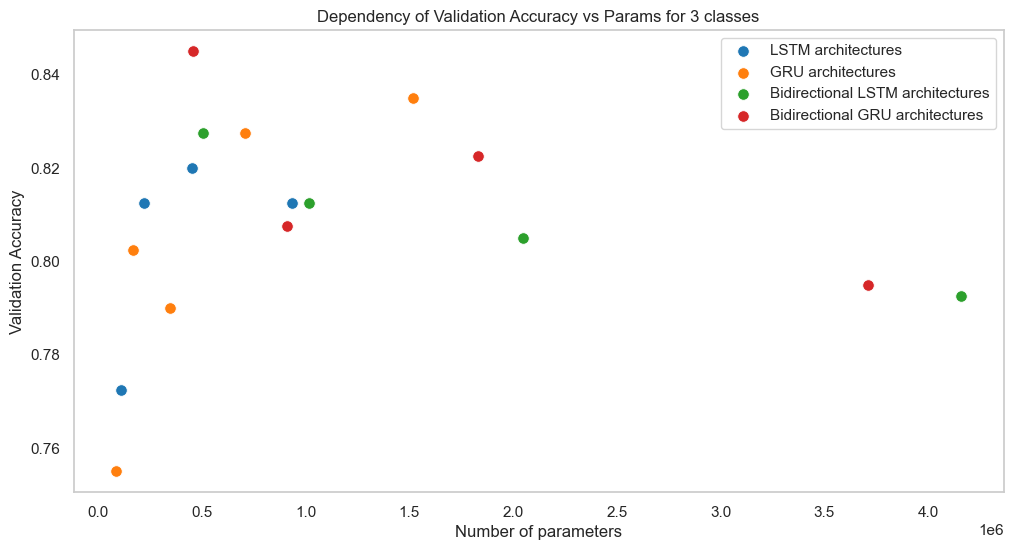

In [85]:
# Set the color palette to "viridis"
sns.set_palette(sns.color_palette("tab10"))

size = 70

plt.figure(figsize=(12, 6))
plt.title("Dependency of Validation Accuracy vs Params for 3 classes")
sns.scatterplot(data=df4[df4["class"] == "LSTM-AK"], x="params", y="accuracy", label="LSTM architectures", s=size)
sns.scatterplot(data=df4[df4["class"] == "GRU-AK"], x="params", y="accuracy", label="GRU architectures", s=size)
sns.scatterplot(data=df4[df4["class"] == "BLSTM-AK"], x="params", y="accuracy", label="Bidirectional LSTM architectures", s=size)
sns.scatterplot(data=df4[df4["class"] == "BGRU-AK"], x="params", y="accuracy", label="Bidirectional GRU architectures", s=size)

plt.ylabel("Validation Accuracy")
plt.xlabel("Number of parameters")
plt.legend()
plt.grid()
plt.savefig("5a.png")
plt.show()

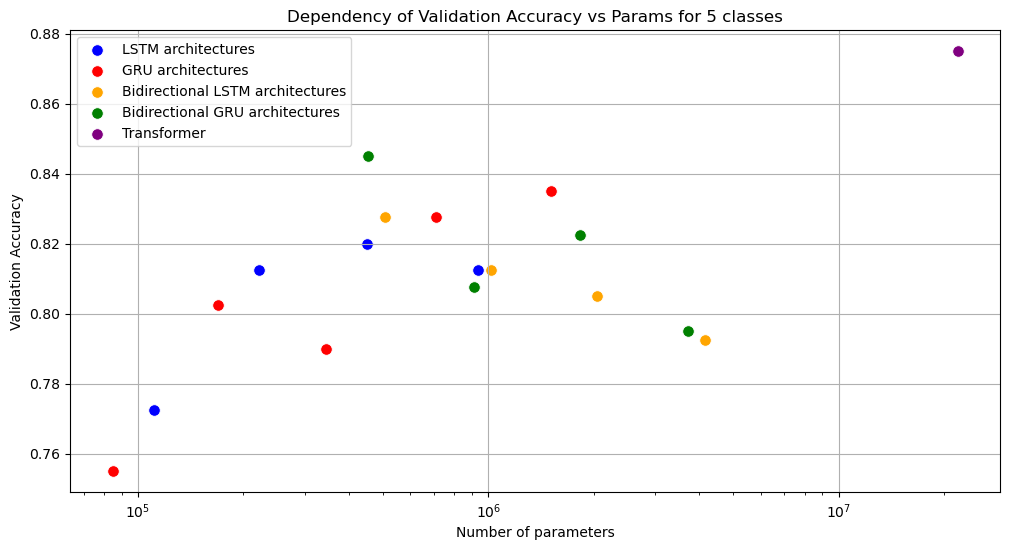

In [7]:
params = [110981 ,222469, 451589 , 934405, 84693,169381, 343365 , 709765 , 1516293, 507141, 1016837 , 2048517 , 4161029 ,454565 , 910661 , 1832069, 3711749, 21933757]
name = ["AK-LSTM16-LR-Dense256", "AK-LSTM32-LR-Dense256", "AK-LSTM64-LR-Dense256", "AK-LSTM128-LR-Dense256", 
        "AK-GRU16-LR-Dense256", "AK-GRU32-LR-Dense256", "AK-GRU64-LR-Dense256", "AK-GRU128-LR-Dense256", "AK-GRU256-LR-Dense256",
        "AK-BLSTM16-LR-Dense256", "AK-BLSTM32-LR-Dense256", "AK-BLSTM64-LR-Dense256", "AK-BLSTM128-LR-Dense256", 
        "AK-BGRU16-LR-Dense256", "AK-BGRU32-LR-Dense256","AK-BGRU64-LR-Dense256", "AK-BGRU128-LR-Dense256",
        "Transformer-e=64-h=2-ff=128-D=0.1-Dense=128"]

label = ["LSTM-AK"] * 4 + ["GRU-AK"] * 5 + ["BLSTM-AK"] * 4 + ["BGRU-AK"] * 4 + ["Transformer-AK"]

accuracy = [0.7725, 0.8125, 0.82, 0.8125, 0.755, 0.8025, 0.79, 0.8275, 0.835, 0.8275, 0.8125, 0.805, 0.7925, 0.845, 0.8075, 0.8225, 0.795, 0.875]



df4 = pd.DataFrame({"params" : params, "class" : label, "accuracy" : accuracy, "name" : name })

df4

# Set the color palette to "viridis"
sns.set_palette(sns.color_palette("tab10"))

size = 70

plt.figure(figsize=(12, 6))
plt.title("Dependency of Validation Accuracy vs Params for 5 classes")
sns.scatterplot(data=df4[df4["class"] == "LSTM-AK"], x="params", y="accuracy", label="LSTM architectures", color="blue", s=size)
sns.scatterplot(data=df4[df4["class"] == "GRU-AK"], x="params", y="accuracy", label="GRU architectures", color="red", s=size)
sns.scatterplot(data=df4[df4["class"] == "BLSTM-AK"], x="params", y="accuracy", label="Bidirectional LSTM architectures", color="orange", s=size)
sns.scatterplot(data=df4[df4["class"] == "BGRU-AK"], x="params", y="accuracy", label="Bidirectional GRU architectures", color="green", s=size)
sns.scatterplot(data=df4[df4["class"] == "Transformer-AK"], x="params", y="accuracy", label="Transformer", color="purple", s=size)

plt.ylabel("Validation Accuracy")
plt.xlabel("Number of parameters")
plt.legend()
plt.xscale("log")
plt.grid()
plt.savefig("5b.png")
plt.show()

# 5

In [21]:
params = [32069 ,64645 , 135941 , 303109, 25509 , 51013 , 106629  ,236293  ,569349 ,349317 ,701189  , 1417221 , 2898437  ,336197 , 673925  , 1358597 ,2764805, 1477957 ]
name = ["RK-LSTM16-LR-Dense256", "RK-LSTM32-LR-Dense256", "RK-LSTM64-LR-Dense256", "RK-LSTM128-LR-Dense256", 
        "RK-GRU16-LR-Dense256", "RK-GRU32-LR-Dense256", "RK-GRU64-LR-Dense256", "RK-GRU128-LR-Dense256", "RK-GRU256-LR-Dense256",
        "RK-BLSTM16-LR-Dense256", "RK-BLSTM32-LR-Dense256", "RK-BLSTM64-LR-Dense256", "RK-BLSTM128-LR-Dense256", 
        "RK-BGRU16-LR-Dense256", "RK-BGRU32-LR-Dense256","RK-BGRU64-LR-Dense256", "RK-BGRU128-LR-Dense256",
        "Transformer-embed=128-heads=2-ff=128-D=0.1-Dense=128-Dense=256-LipsEyesHandsPose_5k"]

label = ["LSTM-RK"] * 4 + ["GRU-RK"] * 5 + ["BLSTM-RK"] * 4 + ["BGRU-RK"] * 4 + ["Transformer-RK"]

accuracy = [0.705, 0.7225, 0.705, 0.71, 0.735, 0.725, 0.72, 0.74, 0.76, 0.6925, 0.685, 0.71, 0.725, 0.72, 0.715, 0.7325, 0.735, 0.735]

df5 = pd.DataFrame({"params" : params, "class" : label, "accuracy" : accuracy, "name" : name })
df5

,params,class,accuracy,name
0,32069,LSTM-RK,0.7050,RK-LSTM16-LR-Dense256
1,64645,LSTM-RK,0.7225,RK-LSTM32-LR-Dense256
2,135941,LSTM-RK,0.7050,RK-LSTM64-LR-Dense256
3,303109,LSTM-RK,0.7100,RK-LSTM128-LR-Dense256
4,25509,GRU-RK,0.7350,RK-GRU16-LR-Dense256
5,51013,GRU-RK,0.7250,RK-GRU32-LR-Dense256
6,106629,GRU-RK,0.7200,RK-GRU64-LR-Dense256
7,236293,GRU-RK,0.7400,RK-GRU128-LR-Dense256
8,569349,GRU-RK,0.7600,RK-GRU256-LR-Dense256
9,349317,BLSTM-RK,0.6925,RK-BLSTM16-LR-Dense256


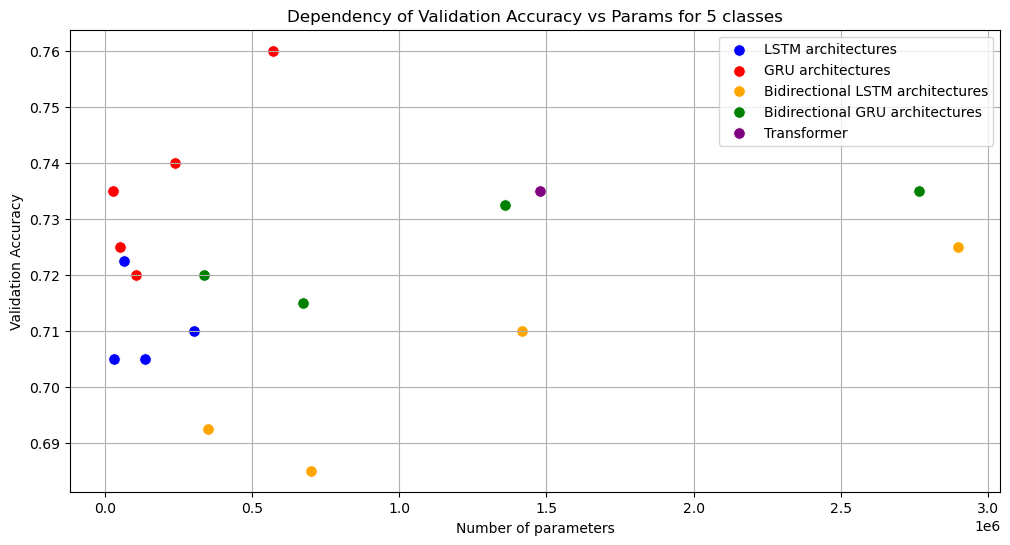

In [10]:
# Set the color palette to "viridis"
sns.set_palette(sns.color_palette("tab10"))

size = 70


plt.figure(figsize=(12, 6))
plt.title("Dependency of Validation Accuracy vs Params for 5 classes")
sns.scatterplot(data=df5[df5["class"] == "LSTM-RK"], x="params", y="accuracy", label="LSTM architectures", color="blue", s=size)
sns.scatterplot(data=df5[df5["class"] == "GRU-RK"], x="params", y="accuracy", label="GRU architectures", color="red", s=size)
sns.scatterplot(data=df5[df5["class"] == "BLSTM-RK"], x="params", y="accuracy", label="Bidirectional LSTM architectures", color="orange", s=size)
sns.scatterplot(data=df5[df5["class"] == "BGRU-RK"], x="params", y="accuracy", label="Bidirectional GRU architectures", color="green", s=size)
sns.scatterplot(data=df5[df5["class"] == "Transformer-RK"], x="params", y="accuracy", label="Transformer", color="purple", s=size)

plt.ylabel("Validation Accuracy")
plt.xlabel("Number of parameters")
plt.legend()
plt.grid()
plt.savefig("5c.png")
plt.show()

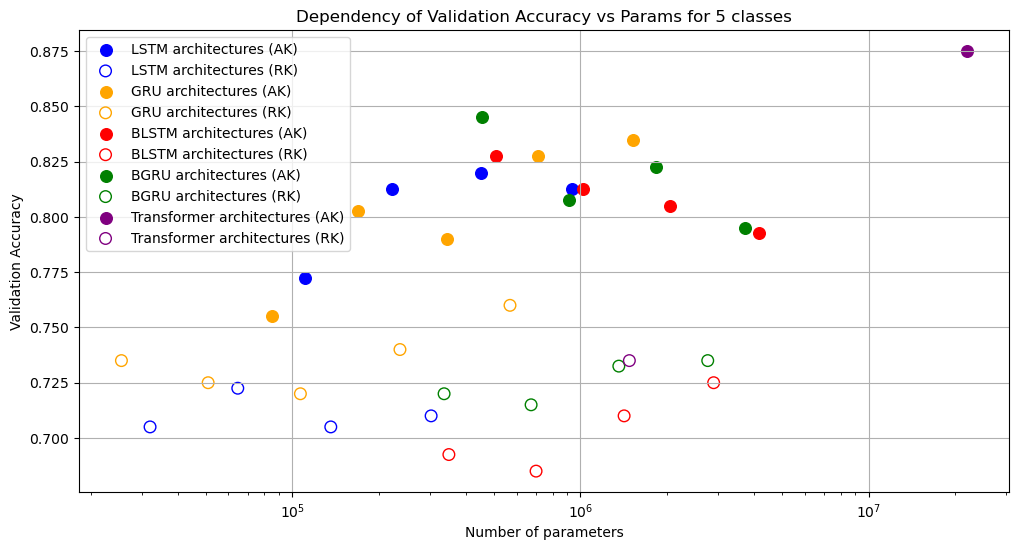

In [13]:
df6 = pd.concat([df4, df5])

df6["style"] = "RK"
df6.loc[df6["class"].str.contains("AK"), "style"] = "AK"

plt.figure(figsize=(12, 6))
plt.title("Dependency of Validation Accuracy vs Params for 5 classes")

vals = ["LSTM", "GRU", "BLSTM","BGRU", "Transformer"]
col = ["blue", "orange", "red", "green", "purple"]

for arch, color in zip(vals, col):
    plt.scatter(df6[df6["class"] == arch + "-AK"]["params"], df6[df6['class'] == arch + "-AK"]["accuracy"], color=color, marker="o", label=f"{arch} architectures (AK)", s=size)
    plt.scatter(df6[df6["class"] == arch + "-RK"]["params"], df6[df6['class'] == arch + "-RK"]["accuracy"], color=color, marker="o", facecolors='none', label=f"{arch} architectures (RK)", s=size)
    
plt.xlabel("Number of parameters [mln]")
plt.ylabel("validation accuracy")

plt.ylabel("Validation Accuracy")
plt.xlabel("Number of parameters")
plt.legend()
plt.grid()
plt.xscale("log")
plt.savefig("5d.png")
plt.show()

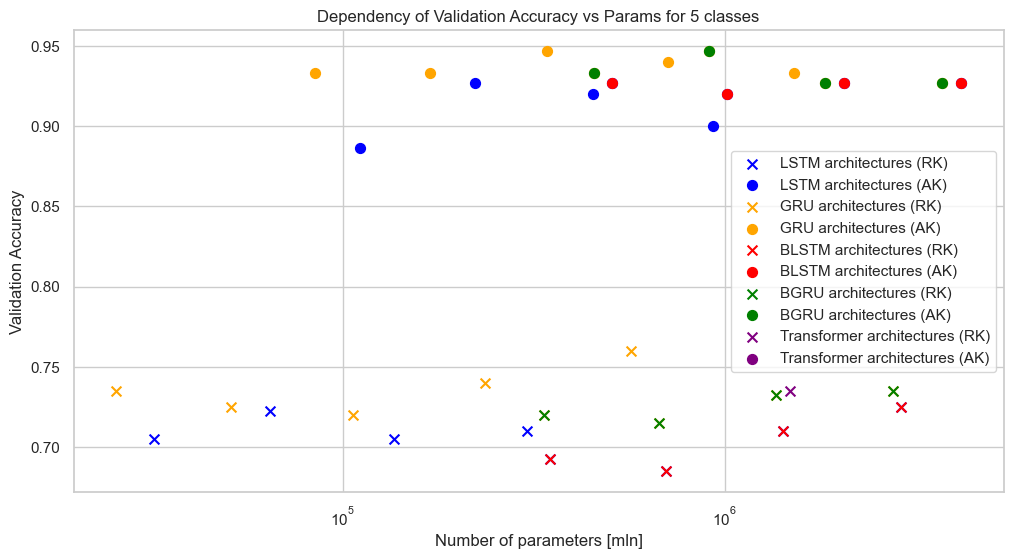

Highest validation accuracy for LSTM (RK): 0.7250
Highest validation accuracy for LSTM (AK): 0.9267
Highest validation accuracy for GRU (RK): 0.7600
Highest validation accuracy for GRU (AK): 0.9467
Highest validation accuracy for BLSTM (RK): 0.7250
Highest validation accuracy for BLSTM (AK): 0.9267
Highest validation accuracy for BGRU (RK): 0.7350
Highest validation accuracy for BGRU (AK): 0.9467
Highest validation accuracy for Transformer (RK): 0.7350
Highest validation accuracy for Transformer (AK): nan


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
params = [
    32069, 64645, 135941, 303109, 25509, 51013, 106629, 236293, 569349, 349317,
    701189, 1417221, 2898437, 336197, 673925, 1358597, 2764805, 1477957
]
name = [
    "RK-LSTM16-LR-Dense256", "RK-LSTM32-LR-Dense256", "RK-LSTM64-LR-Dense256", "RK-LSTM128-LR-Dense256",
    "RK-GRU16-LR-Dense256", "RK-GRU32-LR-Dense256", "RK-GRU64-LR-Dense256", "RK-GRU128-LR-Dense256", "RK-GRU256-LR-Dense256",
    "RK-BLSTM16-LR-Dense256", "RK-BLSTM32-LR-Dense256", "RK-BLSTM64-LR-Dense256", "RK-BLSTM128-LR-Dense256",
    "RK-BGRU16-LR-Dense256", "RK-BGRU32-LR-Dense256", "RK-BGRU64-LR-Dense256", "RK-BGRU128-LR-Dense256",
    "Transformer-embed=128-heads=2-ff=128-D=0.1-Dense=128-Dense=256-LipsEyesHandsPose_5k"
]
label = ["LSTM-RK"] * 4 + ["GRU-RK"] * 5 + ["BLSTM-RK"] * 4 + ["BGRU-RK"] * 4 + ["Transformer-RK"]
accuracy = [
    0.705, 0.7225, 0.705, 0.71, 0.735, 0.725, 0.72, 0.74, 0.76, 0.6925,
    0.685, 0.71, 0.725, 0.72, 0.715, 0.7325, 0.735, 0.735
]
df5 = pd.DataFrame({"params" : params, "class" : label, "accuracy" : accuracy, "name" : name })

#0.875
params = [110981 ,222469, 451589 , 934405, 84693,169381, 343365 , 709765 , 1516293, 507141, 1016837 , 2048517 , 4161029 ,454565 , 910661 , 1832069, 3711749, 21933757]
name = ["AK-LSTM16-LR-Dense256", "AK-LSTM32-LR-Dense256", "AK-LSTM64-LR-Dense256", "AK-LSTM128-LR-Dense256", 
        "AK-GRU16-LR-Dense256", "AK-GRU32-LR-Dense256", "AK-GRU64-LR-Dense256", "AK-GRU128-LR-Dense256", "AK-GRU256-LR-Dense256",
        "AK-BLSTM16-LR-Dense256", "AK-BLSTM32-LR-Dense256", "AK-BLSTM64-LR-Dense256", "AK-BLSTM128-LR-Dense256", 
        "AK-BGRU16-LR-Dense256", "AK-BGRU32-LR-Dense256","AK-BGRU64-LR-Dense256", "AK-BGRU128-LR-Dense256",
        "Transformer-e=64-h=2-ff=128-D=0.1-Dense=128"]

label = ["LSTM-AK"] * 4 + ["GRU-AK"] * 5 + ["BLSTM-AK"] * 4 + ["BGRU-AK"] * 4 + ["Transformer-AK"]
accuracy = [0.7725, 0.8125, 0.82, 0.8125, 0.755, 0.8025, 0.79, 0.8275, 0.835, 0.8275, 0.8125, 0.805, 0.7925, 0.845, 0.8075, 0.8225, 0.795, 0.875]
df4 = pd.DataFrame({"params" : params, "class" : label, "accuracy" : accuracy, "name" : name })


# Create DataFrame
df5 = pd.DataFrame({"params": params, "class": label, "accuracy": accuracy, "name": name})

# Assuming df4 is prepared similarly
df6 = pd.concat([df4, df5])
df6["style"] = "RK"
df6.loc[df6["class"].str.contains("AK"), "style"] = "AK"

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Dependency of Validation Accuracy vs Params for 5 classes")
vals = ["LSTM", "GRU", "BLSTM", "BGRU", "Transformer"]
col = ["blue", "orange", "red", "green", "purple"]

for arch, color in zip(vals, col):
    subset_rk = df6[(df6["class"].str.contains(arch)) & (df6["style"] == "RK")]
    subset_ak = df6[(df6["class"].str.contains(arch)) & (df6["style"] == "AK")]
    
    plt.scatter(subset_rk["params"], subset_rk["accuracy"], color=color, marker="x", label=f"{arch} architectures (RK)", s=50)
    plt.scatter(subset_ak["params"], subset_ak["accuracy"], color=color, marker="o", label=f"{arch} architectures (AK)", s=50)

# Label and adjust
plt.xlabel("Number of parameters [mln]")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.show()

# Print highest accuracies
for arch in vals:
    max_acc_rk = df6[(df6["class"].str.contains(arch)) & (df6["style"] == "RK")]["accuracy"].max()
    max_acc_ak = df6[(df6["class"].str.contains(arch)) & (df6["style"] == "AK")]["accuracy"].max()
    print(f"Highest validation accuracy for {arch} (RK): {max_acc_rk:.4f}")
    print(f"Highest validation accuracy for {arch} (AK): {max_acc_ak:.4f}")


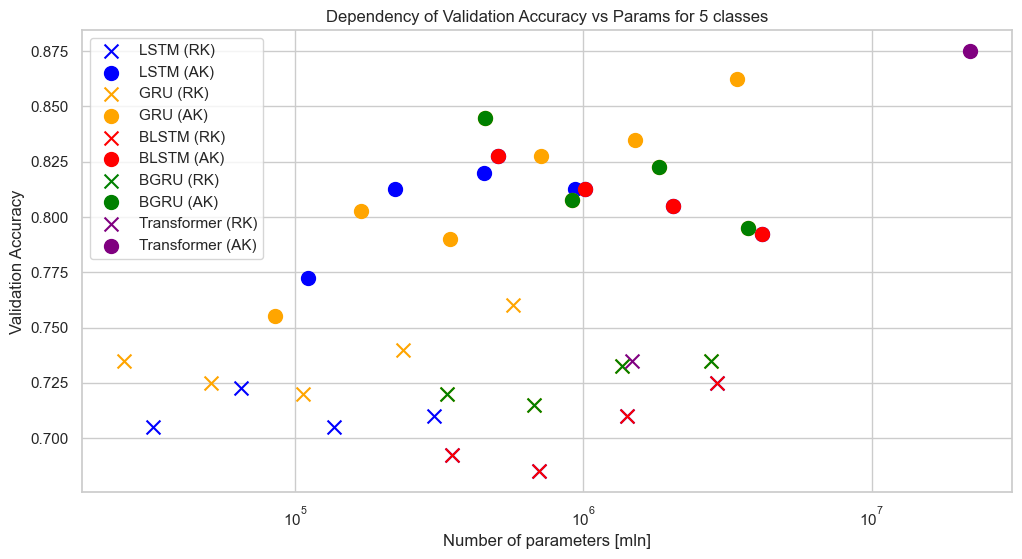

Highest validation accuracy for LSTM (RK): 0.7250
Highest validation accuracy for LSTM (AK): 0.8275
Highest validation accuracy for GRU (RK): 0.7600
Highest validation accuracy for GRU (AK): 0.8625
Highest validation accuracy for BLSTM (RK): 0.7250
Highest validation accuracy for BLSTM (AK): 0.8275
Highest validation accuracy for BGRU (RK): 0.7350
Highest validation accuracy for BGRU (AK): 0.8450
Highest validation accuracy for Transformer (RK): 0.7350
Highest validation accuracy for Transformer (AK): 0.8750


In [30]:
#refine once again - manual plotting due to poor auto labelling
import pandas as pd
import matplotlib.pyplot as plt

# Define data for RK architectures
params_rk = [
    32069, 64645, 135941, 303109, 25509, 51013, 106629, 236293, 569349, 349317,
    701189, 1417221, 2898437, 336197, 673925, 1358597, 2764805, 1477957
]
names_rk = [
    "RK-LSTM16-LR-Dense256", "RK-LSTM32-LR-Dense256", "RK-LSTM64-LR-Dense256", "RK-LSTM128-LR-Dense256",
    "RK-GRU16-LR-Dense256", "RK-GRU32-LR-Dense256", "RK-GRU64-LR-Dense256", "RK-GRU128-LR-Dense256", "RK-GRU256-LR-Dense256",
    "RK-BLSTM16-LR-Dense256", "RK-BLSTM32-LR-Dense256", "RK-BLSTM64-LR-Dense256", "RK-BLSTM128-LR-Dense256",
    "RK-BGRU16-LR-Dense256", "RK-BGRU32-LR-Dense256", "RK-BGRU64-LR-Dense256", "RK-BGRU128-LR-Dense256",
    "Transformer-embed=128-heads=2-ff=128-D=0.1-Dense=128-Dense=256-LipsEyesHandsPose_5k"
]
accuracy_rk = [
    0.705, 0.7225, 0.705, 0.71, 0.735, 0.725, 0.72, 0.74, 0.76, 0.6925,
    0.685, 0.71, 0.725, 0.72, 0.715, 0.7325, 0.735, 0.735
]
df_rk = pd.DataFrame({"params": params_rk, "class": ["LSTM-RK"] * 4 + ["GRU-RK"] * 5 + ["BLSTM-RK"] * 4 + ["BGRU-RK"] * 4 + ["Transformer-RK"], "accuracy": accuracy_rk, "name": names_rk})

# Define data for AK architectures
params_ak = [
    110981, 222469, 451589, 934405, 84693, 169381, 343365, 709765, 1516293, 3423747 , 507141, 1016837, 2048517, 4161029, 454565, 910661, 1832069, 3711749, 21933757
]
names_ak = [
    "AK-LSTM16-LR-Dense256", "AK-LSTM32-LR-Dense256", "AK-LSTM64-LR-Dense256", "AK-LSTM128-LR-Dense256",
    "AK-GRU16-LR-Dense256", "AK-GRU32-LR-Dense256", "AK-GRU64-LR-Dense256", "AK-GRU128-LR-Dense256", "AK-GRU256-LR-Dense256", "AK-GRU512-LR-Dense256",
    "AK-BLSTM16-LR-Dense256", "AK-BLSTM32-LR-Dense256", "AK-BLSTM64-LR-Dense256", "AK-BLSTM128-LR-Dense256",
    "AK-BGRU16-LR-Dense256", "AK-BGRU32-LR-Dense256", "AK-BGRU64-LR-Dense256", "AK-BGRU128-LR-Dense256",
    "Transformer-e=64-h=2-ff=128-D=0.1-Dense=128"
]
accuracy_ak = [0.7725, 0.8125, 0.82, 0.8125, 0.755, 0.8025, 0.79, 0.8275, 0.835,  0.8625, 0.8275, 0.8125, 0.805, 0.7925, 0.845, 0.8075, 0.8225, 0.795, 0.875]
df_ak = pd.DataFrame({"params": params_ak, "class": ["LSTM-AK"] * 4 + ["GRU-AK"] * 6 + ["BLSTM-AK"] * 4 + ["BGRU-AK"] * 4 + ["Transformer-AK"], "accuracy": accuracy_ak, "name": names_ak})

# Combine both DataFrames
df = pd.concat([df_rk, df_ak])

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Dependency of Validation Accuracy vs Params for 5 classes")
vals = ["LSTM", "GRU", "BLSTM", "BGRU", "Transformer"]
colors = ["blue", "orange", "red", "green", "purple"]

for arch, color in zip(vals, colors):
    subset_rk = df[(df["class"].str.contains(arch)) & (df["class"].str.contains("RK"))]
    subset_ak = df[(df["class"].str.contains(arch)) & (df["class"].str.contains("AK"))]
    
    plt.scatter(subset_rk["params"], subset_rk["accuracy"], color=color, marker="x", label=f"{arch} (RK)", s=100)
    plt.scatter(subset_ak["params"], subset_ak["accuracy"], color=color, marker="o", label=f"{arch} (AK)", s=100)

plt.xlabel("Number of parameters [mln]")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.savefig("Dependency_val_graph.png", dpi=300)
plt.show()

# Print highest accuracies
for arch in vals:
    max_acc_rk = df[(df["class"].str.contains(arch)) & (df["class"].str.contains("RK"))]["accuracy"].max()
    max_acc_ak = df[(df["class"].str.contains(arch)) & (df["class"].str.contains("AK"))]["accuracy"].max()
    print(f"Highest validation accuracy for {arch} (RK): {max_acc_rk:.4f}")
    print(f"Highest validation accuracy for {arch} (AK): {max_acc_ak:.4f}")




# 6 - Frame Length Against Val Accuracy

In [23]:
df7 = pd.read_csv("mediapipe-the-horror-is-over.csv")

cls_eq_5 = df7[df7["unique_classes"]  == 5]
cls_eq_5.shape

(139, 30)

In [24]:
cls_eq_5.columns

Index(['Name', 'epoch/val_categorical_accuracy (Max)',
       'epoch/categorical_accuracy (Max)', 'State', 'Notes', 'User', 'Tags',
       'Created', 'Runtime', 'Sweep', 'T_max', 'epochs', 'features', 'max_lr',
       'min_lr', 'scheduler', 'train_size', 'unique_classes', 'val_size',
       'video_length', 'epoch/categorical_crossentropy', 'epoch/epoch',
       'epoch/loss', 'epoch/val_categorical_crossentropy', 'epoch/val_loss',
       'epoch/f1_micro_tf', 'epoch/mcc_metric_tf', 'epoch/val_f1_micro_tf',
       'epoch/val_mcc_metric_tf', 'epoch/learning_rate'],
      dtype='object')

(array([22.,  0.,  0.,  2., 92.,  0.,  0.,  0.,  0., 23.]),
 array([15. , 19.5, 24. , 28.5, 33. , 37.5, 42. , 46.5, 51. , 55.5, 60. ]),
 <BarContainer object of 10 artists>)

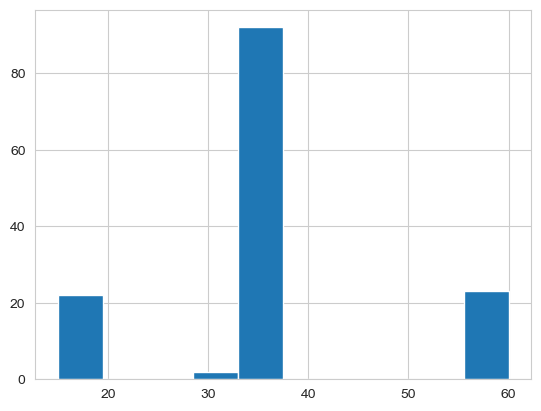

In [25]:
plt.hist(cls_eq_5["video_length"])


In [26]:
cls_eq_5["architecture"] = "LSTM"
cls_eq_5.loc[cls_eq_5["Name"].str.contains("-GRU"), "architecture"] = "GRU"
cls_eq_5.loc[cls_eq_5["Name"].str.contains("-BLSTM"), "architecture"] = "BLSTM"
cls_eq_5.loc[cls_eq_5["Name"].str.contains("-BGRU"), "architecture"] = "BGRU"
cls_eq_5.loc[cls_eq_5["Name"].str.contains("ransformer"), "architecture"] = "transformer"


C:\Users\mered\AppData\Local\Temp\ipykernel_10580\1202296743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls_eq_5["architecture"] = "LSTM"


C:\Users\mered\AppData\Local\Temp\ipykernel_10580\1038838398.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls_eq_5['Run Identifier'] = cls_eq_5.groupby('video_length').cumcount() + 1
C:\Users\mered\AppData\Local\Temp\ipykernel_10580\1038838398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls_eq_5['Run Identifier'] = cls_eq_5['Run Identifier'].astype(str)
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in

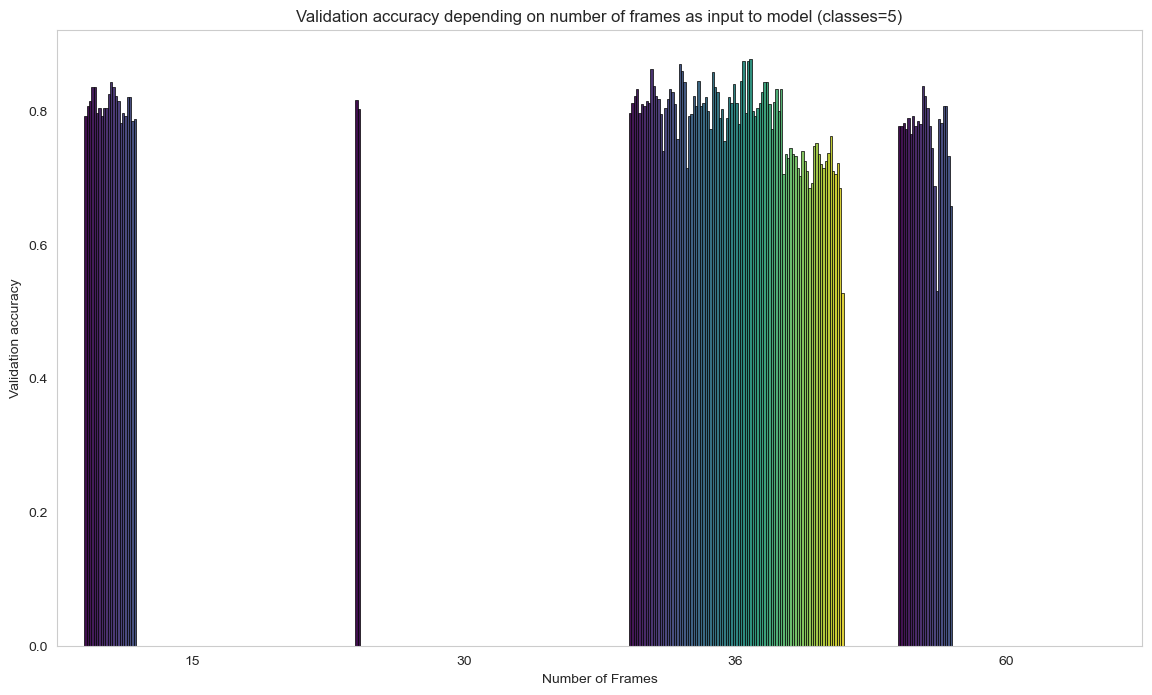

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
# Create a unique identifier for each run within each architecture
cls_eq_5['Run Identifier'] = cls_eq_5.groupby('video_length').cumcount() + 1
cls_eq_5['Run Identifier'] = cls_eq_5['Run Identifier'].astype(str)

# Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=cls_eq_5,
    x='video_length',
    y='epoch/val_categorical_accuracy (Max)',
    hue='Run Identifier',  # This will create a separate bar for each run within the architecture
    dodge=True,  # Ensures bars are side-by-side
    palette='viridis',  # Adjust color palette for visibility
    edgecolor='black',
    linewidth=0.5  # Line width for edges
)

plt.xlabel('Number of Frames')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy depending on number of frames as input to model (classes=5)')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit of x-axis labels
plt.grid(axis='y')  # Add a grid for the y axis
plt.legend().remove()  # This will remove the legend from the plot
plt.savefig("6a.png")
plt.show()


C:\Users\mered\AppData\Local\Temp\ipykernel_10580\1899151241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls_eq_5['Run Identifier'] = cls_eq_5.groupby('video_length').cumcount() + 1
C:\Users\mered\AppData\Local\Temp\ipykernel_10580\1899151241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls_eq_5['Run Identifier'] = cls_eq_5['Run Identifier'].astype(str)
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in

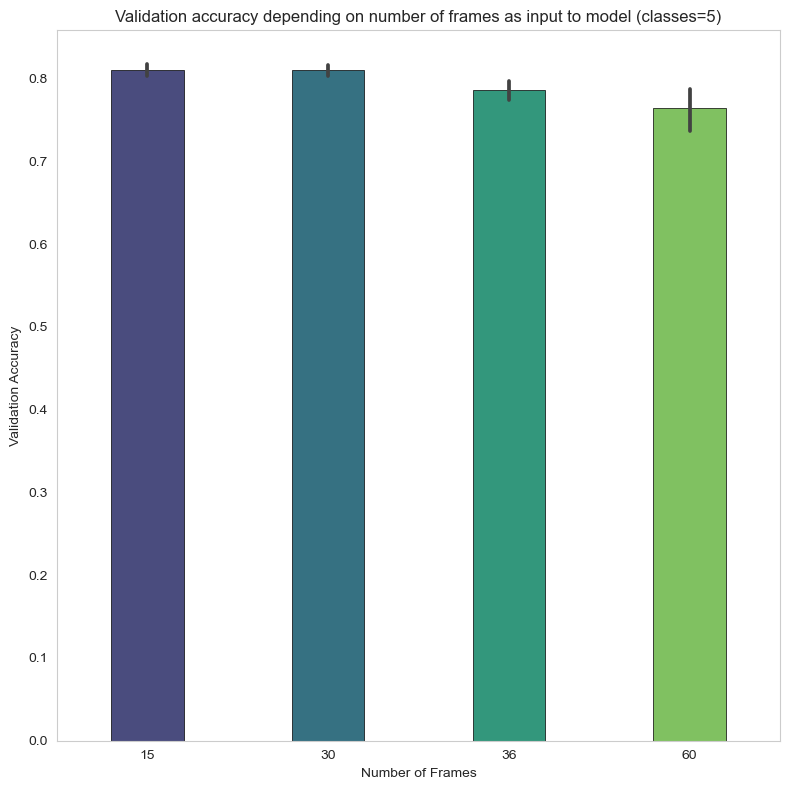

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
# Create a unique identifier for each run within each architecture
cls_eq_5['Run Identifier'] = cls_eq_5.groupby('video_length').cumcount() + 1
cls_eq_5['Run Identifier'] = cls_eq_5['Run Identifier'].astype(str)

# Plotting
plt.figure(figsize=(8, 8))
barplot = sns.barplot(
    data=cls_eq_5,
    x='video_length',
    y='epoch/val_categorical_accuracy (Max)',
    dodge=True,  # Ensures bars are side-by-side
    palette='viridis',  # Adjust color palette for visibility
    edgecolor='black',
    linewidth=0.5,
    width=0.4
)

plt.xlabel('Number of Frames')
plt.ylabel('Validation Accuracy')
plt.title('Validation accuracy depending on number of frames as input to model (classes=5)')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit of x-axis labels
plt.grid(axis='y')  # Add a grid for the y axis
plt.legend().remove()  # This will remove the legend from the plot
plt.savefig("6b.png")
plt.show()


In [29]:
print(df.columns)

Index(['Name', 'epoch/val_categorical_accuracy (Max)', 'unique_classes',
       'Notes', 'Runtime', 'T_max', 'epochs', 'features', 'max_lr', 'min_lr',
       'scheduler', 'train_size', 'val_size', 'video_length',
       'epoch/categorical_accuracy (Max)', 'epoch/epoch',
       'epoch/learning_rate (Min)', 'epoch/loss (Min)', 'epoch/val_loss (Min)',
       'epoch/f1_micro_tf', 'epoch/mcc_metric_tf', 'epoch/val_f1_micro_tf',
       'epoch/val_mcc_metric_tf', 'label', 'architecture_type'],
      dtype='object')


In [30]:
import numpy as np 

un_classes = [3, 5, 13]
architectures = np.unique(df["architecture_type"])

classes = []
names = []
values = []
types = []

for cls in un_classes:
    cls_selection = df[df["unique_classes"] == cls]
    for arch in architectures:
        arch_sel = cls_selection[cls_selection["architecture_type"] == arch]
        
        accuracy = 0
        name = None
        if arch_sel.shape[0] != 0:
            idx = np.argmax(arch_sel["epoch/val_categorical_accuracy (Max)"])
            row = arch_sel.iloc[idx]
            accuracy = row["epoch/val_categorical_accuracy (Max)"]
            name = row["Name"]
        
        
        classes.append(cls)
        types.append(arch)
        names.append(name)
        values.append(accuracy)


In [31]:
sad_df = pd.DataFrame({"classes" : classes, "names" : names, "values" : values, "types" : types})

c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mered\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

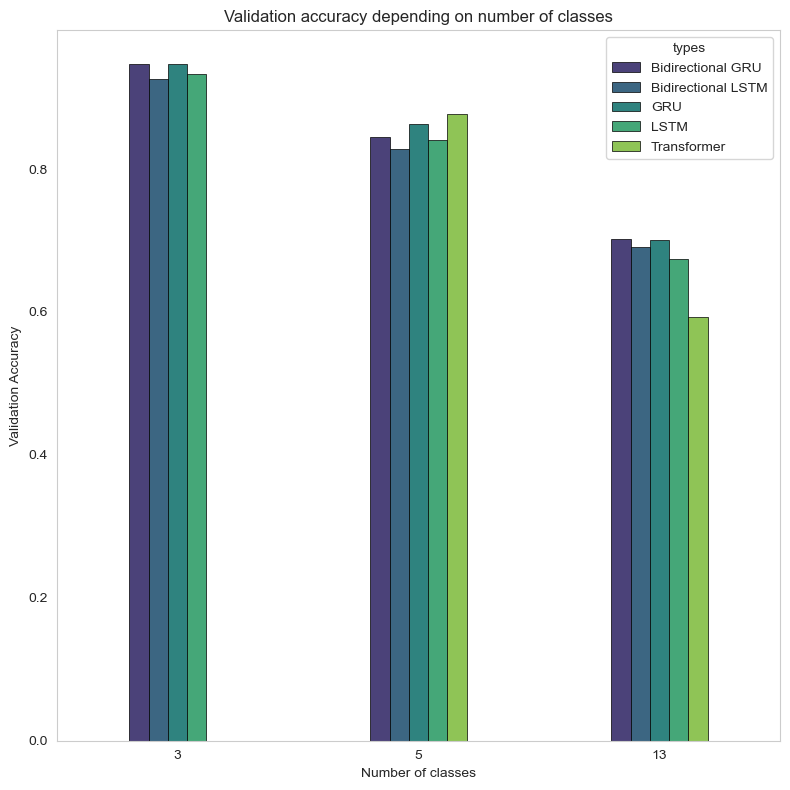

In [32]:
plt.figure(figsize=(8, 8))
barplot = sns.barplot(
    data=sad_df,
    x='classes',
    y='values',
    hue="types",
    dodge=True,  # Ensures bars are side-by-side
    palette='viridis',  # Adjust color palette for visibility
    edgecolor='black',
    linewidth=0.5,
    width=0.4
)

plt.xlabel('Number of classes')
plt.ylabel('Validation Accuracy')
plt.title('Validation accuracy depending on number of classes')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit of x-axis labels
plt.grid(axis='y')  # Add a grid for the y axis
plt.savefig("7.png")
plt.show()
